# Select specific rows and columns

In [68]:
import pandas as pd 
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [69]:
# select columns
df[['sex', 'class', 'deck']]

,sex,class,deck
0,male,Third,NaN
1,female,First,C
2,female,Third,NaN
3,female,First,C
4,male,Third,NaN
...,...,...,...
886,male,Second,NaN
887,female,First,B
888,female,Third,NaN
889,male,First,C


In [70]:
# select Rows

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
# df.describe().loc[['min', '25%', '50%', '75%', 'max']]
# OR
df.describe().loc['min' : 'max']

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [72]:
# Select rows and columns at a time

df.describe().loc['min' : 'max', ['survived', 'age']]

,survived,age
min,0.0,0.420
25%,0.0,20.125
50%,0.0,28.000
75%,1.0,38.000
max,1.0,80.000


In [73]:
df.describe().loc['min' : 'max', 'survived' : 'age']

,survived,pclass,age
min,0.0,1.0,0.420
25%,0.0,2.0,20.125
50%,0.0,3.0,28.000
75%,1.0,3.0,38.000
max,1.0,3.0,80.000


# Reshape multiIndex series

In [74]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [75]:
df.survived.mean()

np.float64(0.3838383838383838)

In [76]:
df.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [82]:
df.groupby(['sex', 'class'], observed=False).survived.mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [83]:
df.groupby(['sex', 'class'], observed=False).survived.mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Continuous to categorial data conversion

In [39]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
df.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [41]:
# creating bins
pd.cut(df.age, bins = [0, 18, 25, 99], labels=['childs', 'adults', 'youngs']).head()

0    adults
1    youngs
2    youngs
3    youngs
4    youngs
Name: age, dtype: category
Categories (3, object): ['childs' < 'adults' < 'youngs']

In [42]:
# add new column to end

df['new_age'] = pd.cut(df.age, bins = [0, 18, 25, 99], labels=['childs', 'adults', 'youngs']).head()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adults
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,youngs
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,youngs
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,youngs


# Convert one set of values into another one 

In [43]:
df.sex.head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [44]:
df.sex.map({'male':0, 'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [45]:
df['new_nums'] = df.sex.map({'male':0, 'female':1})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,new_nums
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adults,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,youngs,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,youngs,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,youngs,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,youngs,0


# Transpose a wide dataframe

In [46]:
import numpy as np
# create a new dataframe

df = pd.DataFrame(np.random.rand(200, 25), columns=list('abcdefghijklmnopqrstuvwxy'))
df.head()

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
0,0.373560,0.116477,0.842512,0.628628,0.352662,0.454771,0.782422,0.373511,0.696754,0.094493,...,0.035105,0.260997,0.942033,0.443916,0.503012,0.094689,0.967364,0.337882,0.458531,0.396570
1,0.054866,0.299668,0.893591,0.738035,0.781900,0.666771,0.742524,0.865622,0.759245,0.706184,...,0.721800,0.168320,0.200196,0.490904,0.170052,0.379215,0.513760,0.516075,0.168856,0.631289
2,0.290237,0.754183,0.565302,0.232926,0.215352,0.959027,0.299240,0.426789,0.426544,0.600874,...,0.799412,0.117131,0.733444,0.916327,0.962145,0.421797,0.015423,0.821666,0.428576,0.982553
3,0.367993,0.483010,0.934841,0.579332,0.220263,0.815636,0.750460,0.853137,0.678773,0.875045,...,0.619348,0.352133,0.969388,0.339334,0.125795,0.913338,0.025025,0.217928,0.047660,0.428712
4,0.085273,0.235417,0.184852,0.023872,0.860493,0.555886,0.676215,0.169572,0.904859,0.510163,...,0.054971,0.796730,0.536281,0.071853,0.505901,0.504877,0.206730,0.774603,0.242014,0.027648


In [47]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
a,0.373560,0.054866,0.290237,0.367993,0.085273,0.969163,0.268766,0.078906,0.865174,0.872359
b,0.116477,0.299668,0.754183,0.483010,0.235417,0.179780,0.609678,0.868006,0.752173,0.430604
c,0.842512,0.893591,0.565302,0.934841,0.184852,0.824464,0.307339,0.680617,0.655844,0.264607
d,0.628628,0.738035,0.232926,0.579332,0.023872,0.153404,0.344171,0.948679,0.984352,0.396892
e,0.352662,0.781900,0.215352,0.220263,0.860493,0.300215,0.221241,0.960197,0.039265,0.370712
f,0.454771,0.666771,0.959027,0.815636,0.555886,0.629780,0.915508,0.806222,0.737969,0.506597
g,0.782422,0.742524,0.299240,0.750460,0.676215,0.847987,0.716105,0.685606,0.578369,0.948779
h,0.373511,0.865622,0.426789,0.853137,0.169572,0.765798,0.483151,0.310610,0.562544,0.192467
i,0.696754,0.759245,0.426544,0.678773,0.904859,0.244361,0.973313,0.597099,0.896883,0.811328
j,0.094493,0.706184,0.600874,0.875045,0.510163,0.862807,0.109748,0.530559,0.923657,0.501009


In [48]:
df.describe()

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.506886,0.503016,0.506089,0.507309,0.497347,0.510654,0.508921,0.508560,0.539812,0.485187,...,0.520626,0.490139,0.494924,0.489892,0.493914,0.544249,0.511519,0.506366,0.463682,0.513812
std,0.292394,0.282977,0.268910,0.284372,0.279283,0.277780,0.283684,0.282664,0.293896,0.290917,...,0.290959,0.303614,0.289457,0.273475,0.281671,0.292384,0.293964,0.291121,0.283184,0.277317
min,0.003042,0.003154,0.012233,0.022925,0.001542,0.031018,0.000245,0.001542,0.001896,0.007542,...,0.006095,0.001677,0.002146,0.002364,0.004312,0.018879,0.001954,0.007156,0.002922,0.003888
25%,0.262375,0.267471,0.295303,0.278089,0.252583,0.288735,0.264154,0.276006,0.282680,0.240829,...,0.252439,0.193051,0.258241,0.275107,0.258869,0.289957,0.263806,0.243249,0.241780,0.298213
50%,0.493935,0.496017,0.497027,0.518097,0.513900,0.489253,0.516368,0.511453,0.591933,0.472549,...,0.547251,0.477576,0.498957,0.491091,0.472155,0.549892,0.509215,0.517193,0.422649,0.520413
75%,0.771601,0.743003,0.717311,0.763008,0.744793,0.766123,0.742635,0.774281,0.776470,0.708338,...,0.762569,0.781469,0.735876,0.704169,0.726535,0.810526,0.776495,0.758185,0.695535,0.748607
max,0.993997,0.998313,0.995001,0.987800,0.966484,0.997941,0.989128,0.989221,0.998004,0.998592,...,0.989146,0.996844,0.997981,0.997119,0.998482,0.999160,0.998948,0.992020,0.997649,0.999799


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,200.0,0.506886,0.292394,0.003042,0.262375,0.493935,0.771601,0.993997
b,200.0,0.503016,0.282977,0.003154,0.267471,0.496017,0.743003,0.998313
c,200.0,0.506089,0.268910,0.012233,0.295303,0.497027,0.717311,0.995001
d,200.0,0.507309,0.284372,0.022925,0.278089,0.518097,0.763008,0.987800
e,200.0,0.497347,0.279283,0.001542,0.252583,0.513900,0.744793,0.966484
f,200.0,0.510654,0.277780,0.031018,0.288735,0.489253,0.766123,0.997941
g,200.0,0.508921,0.283684,0.000245,0.264154,0.516368,0.742635,0.989128
h,200.0,0.508560,0.282664,0.001542,0.276006,0.511453,0.774281,0.989221
i,200.0,0.539812,0.293896,0.001896,0.282680,0.591933,0.776470,0.998004
j,200.0,0.485187,0.290917,0.007542,0.240829,0.472549,0.708338,0.998592


# Reshaping a dataframe 

In [50]:
fasla = pd.DataFrame([['12345', 100, 200, 300], ['34567', 400, 500, 600], ['67890', 700, 800, 900]],
                     columns=['zip', 'factory', 'warehouse', 'retail'])
fasla.head()

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


In [51]:
fasla.head().T

,0,1,2
zip,12345,34567,67890
factory,100,400,700
warehouse,200,500,800
retail,300,600,900


In [52]:
fasla2 = pd.DataFrame([[1,'12345', 'factory'], [2, '34567', 'warehouse']],
                     columns=['user_id', 'zip', 'location_type'])
fasla2.head()

,user_id,zip,location_type
0,1,12345,factory
1,2,34567,warehouse


In [53]:
fasla_long = fasla.melt(id_vars='zip', var_name='location_type', value_name='distnace')
fasla_long

,zip,location_type,distnace
0,12345,factory,100
1,34567,factory,400
2,67890,factory,700
3,12345,warehouse,200
4,34567,warehouse,500
5,67890,warehouse,800
6,12345,retail,300
7,34567,retail,600
8,67890,retail,900


<Axes: xlabel='zip', ylabel='distnace'>

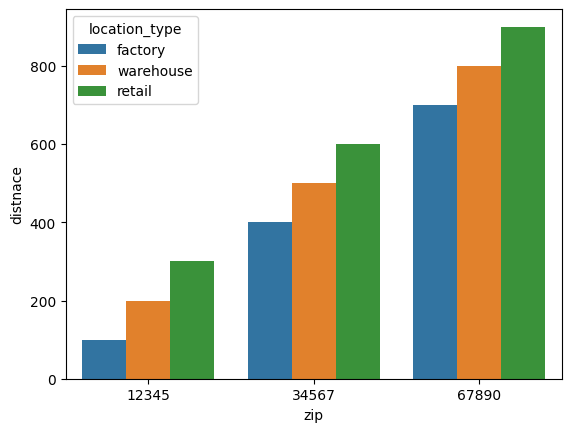

In [54]:
sns.barplot(x='zip', y='distnace', hue='location_type', data= fasla_long)